In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycaret
from pycaret.classification import *

In [2]:
data = pd.read_csv("data_icu.csv")
data = data.rename(columns={"icu_length": "inpatient"})
data = data.drop(columns=['death_inhosp','Mahalanobis','icu_days','age_group','caseid','subjectid'])
data.head()

,Age,Ht,Wt,Sex,OP_time,Open,Robotic,Videoscopic,inpatient
0,18.0,175.1,59.2,0,292.55,1,0,0,1
1,0.7,64.1,8.9,1,475.00,1,0,0,1
2,0.6,42.0,5.6,1,435.00,1,0,0,1
3,0.8,64.1,8.9,1,115.00,1,0,0,1
4,18.0,185.0,62.6,0,210.00,1,0,0,0


In [3]:
data_full = pd.read_csv("data_waveforms_incomplete.csv")
data_full = data_full.rename(columns={"icu_length": "inpatient"})
data_full = data_full.drop(columns=['death_inhosp','Mahalanobis','icu_days','age_group','caseid','subjectid'])
to_norm = ['Age','Ht','Wt','OP_time','rmssds','jumps','perc_outs']
for i in to_norm:
    d = data_full[i]
    data_full[i] = data_full[i].apply(lambda x: (x-min(d))/(max(d)-min(d)))
data_full.head()

,Age,Ht,Wt,Sex,OP_time,Open,Robotic,Videoscopic,inpatient,rmssds,jumps,perc_outs
0,0.199549,0.924306,0.587156,0,0.485870,1,0,0,1,0.000132,0.044776,0.600754
1,0.004510,0.153472,0.044253,1,0.790970,1,0,0,1,0.000126,0.029851,0.315815
2,0.003382,0.000000,0.008635,1,0.724080,1,0,0,1,0.000182,0.000000,0.193891
3,0.005637,0.153472,0.044253,1,0.188963,1,0,0,1,0.000111,0.000000,0.032210
4,0.199549,0.993056,0.623853,0,0.347826,1,0,0,0,0.000400,0.104478,0.465273


# Pycaret (without waveforms)

In [4]:
s = setup(data, target = 'inpatient', session_id=3)

,Description,Value
0,session_id,3
1,Target,inpatient
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1142, 9)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
exp1 = setup(data, target='inpatient')

,Description,Value
0,session_id,2383
1,Target,inpatient
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1142, 9)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7422,0.7647,0.4480,0.6194,0.5162,0.3484,0.3584,0.9380
ridge,Ridge Classifier,0.7397,0.0000,0.4360,0.6213,0.5086,0.3401,0.3519,0.0100
gbc,Gradient Boosting Classifier,0.7385,0.7717,0.4600,0.6062,0.5203,0.3465,0.3538,0.1010
lda,Linear Discriminant Analysis,0.7385,0.7652,0.4920,0.6020,0.5373,0.3587,0.3648,0.0120
et,Extra Trees Classifier,0.7385,0.7725,0.4800,0.6064,0.5315,0.3548,0.3617,0.2580
rf,Random Forest Classifier,0.7310,0.7716,0.4840,0.5869,0.5262,0.3421,0.3476,0.2790
ada,Ada Boost Classifier,0.7246,0.7447,0.4480,0.5787,0.5018,0.3170,0.3235,0.0780
lightgbm,Light Gradient Boosting Machine,0.7197,0.7482,0.4800,0.5666,0.5148,0.3209,0.3259,0.1890
dummy,Dummy Classifier,0.6871,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0160
knn,K Neighbors Classifier,0.6809,0.6103,0.3440,0.4949,0.4023,0.1947,0.2026,0.0620


In [7]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2383, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7125,0.7695,0.4800,0.5455,0.5106,0.3083,0.3095
1,0.6750,0.6589,0.3600,0.4737,0.4091,0.1907,0.1941
2,0.7375,0.7535,0.5200,0.5909,0.5532,0.3684,0.3699
3,0.7000,0.6909,0.3600,0.5294,0.4286,0.2351,0.2431
4,0.7500,0.8356,0.4400,0.6471,0.5238,0.3625,0.3749
5,0.7625,0.7847,0.4800,0.6667,0.5581,0.4016,0.4117
6,0.7250,0.7898,0.3600,0.6000,0.4500,0.2816,0.2980
7,0.8125,0.8429,0.6400,0.7273,0.6809,0.5489,0.5511
8,0.7250,0.7331,0.3600,0.6000,0.4500,0.2816,0.2980


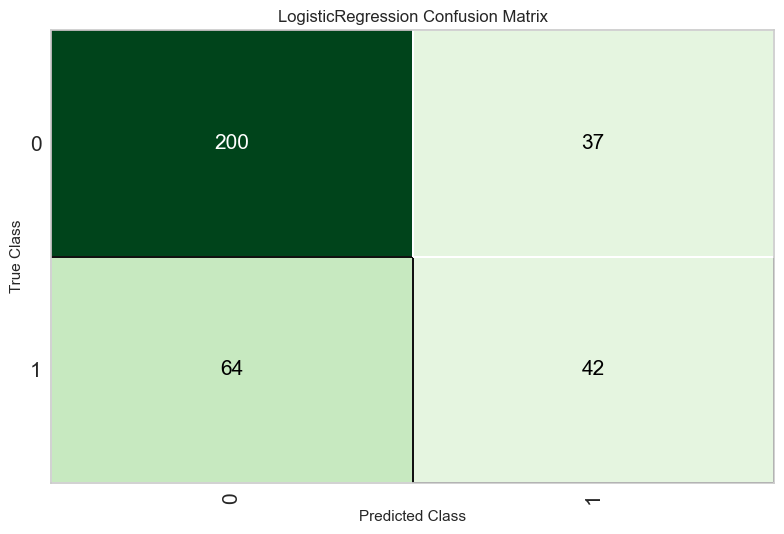

In [9]:
plot_model(best, plot='confusion_matrix')

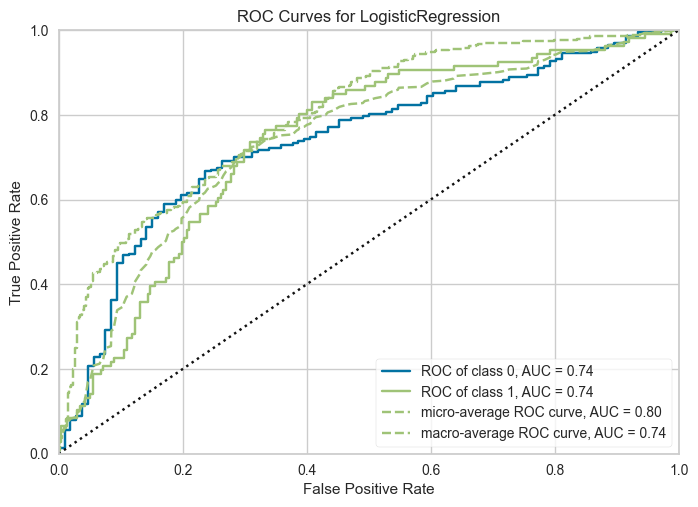

In [10]:
plot_model(best, plot='auc')

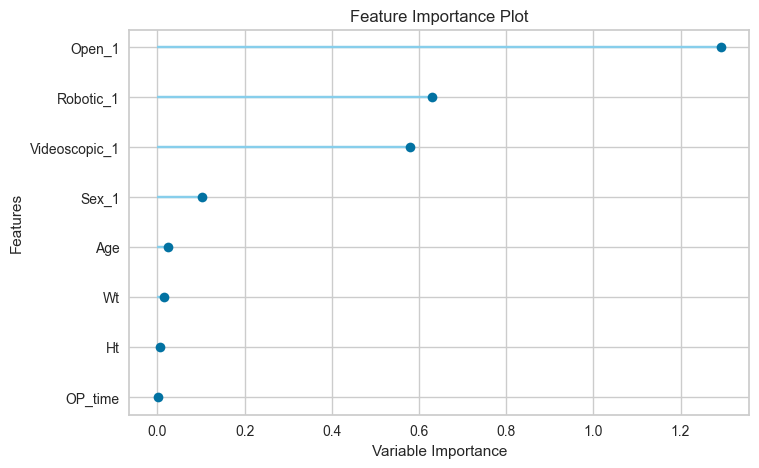

In [11]:
plot_model(best, plot='feature')

# Pycaret (with waveforms)

In [12]:
s = setup(data_full, target = 'inpatient', session_id=3)

,Description,Value
0,session_id,3
1,Target,inpatient
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1136, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
exp1 = setup(data_full, target='inpatient')

,Description,Value
0,session_id,4236
1,Target,inpatient
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1136, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7347,0.7590,0.4780,0.6059,0.5321,0.3512,0.3572,0.2550
ada,Ada Boost Classifier,0.7334,0.7491,0.5097,0.6001,0.5483,0.3614,0.3656,0.0850
gbc,Gradient Boosting Classifier,0.7308,0.7569,0.4617,0.6089,0.5223,0.3396,0.3479,0.1070
ridge,Ridge Classifier,0.7282,0.0000,0.4771,0.5989,0.5253,0.3394,0.3471,0.0100
lr,Logistic Regression,0.7270,0.7566,0.4732,0.5998,0.5238,0.3367,0.3447,0.0200
knn,K Neighbors Classifier,0.7232,0.7215,0.4460,0.5919,0.5057,0.3190,0.3269,0.0640
lda,Linear Discriminant Analysis,0.7132,0.7510,0.5048,0.5615,0.5270,0.3230,0.3269,0.0120
rf,Random Forest Classifier,0.7120,0.7468,0.4340,0.5630,0.4876,0.2926,0.2987,0.2870
lightgbm,Light Gradient Boosting Machine,0.7044,0.7187,0.4665,0.5452,0.5015,0.2934,0.2960,0.1900
svm,SVM - Linear Kernel,0.6844,0.0000,0.6957,0.5126,0.5784,0.3393,0.3605,0.0180


In [15]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4236, verbose=0,
                     warm_start=False)


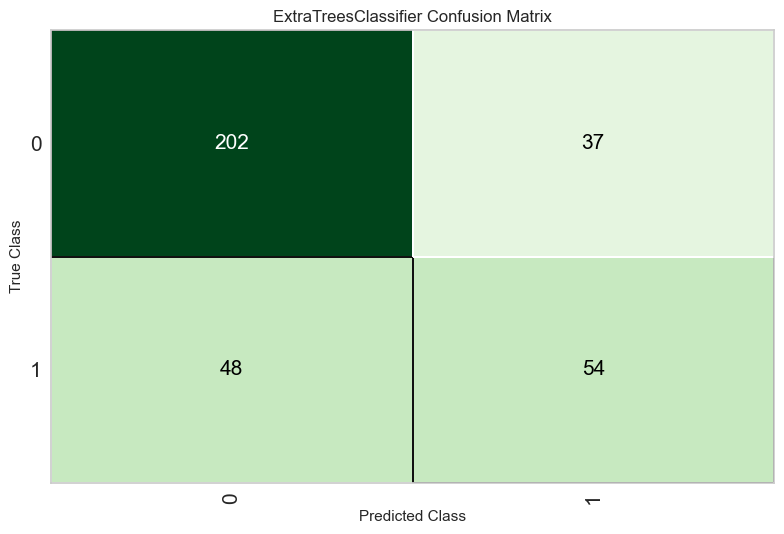

In [16]:
plot_model(best, plot='confusion_matrix')

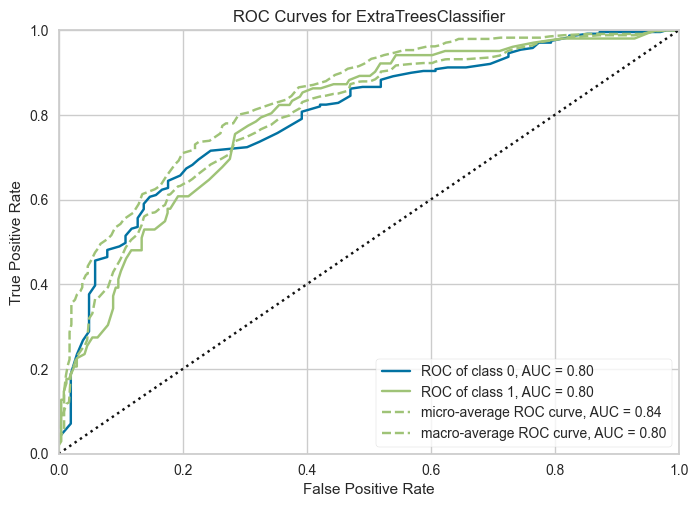

In [17]:
plot_model(best, plot='auc')

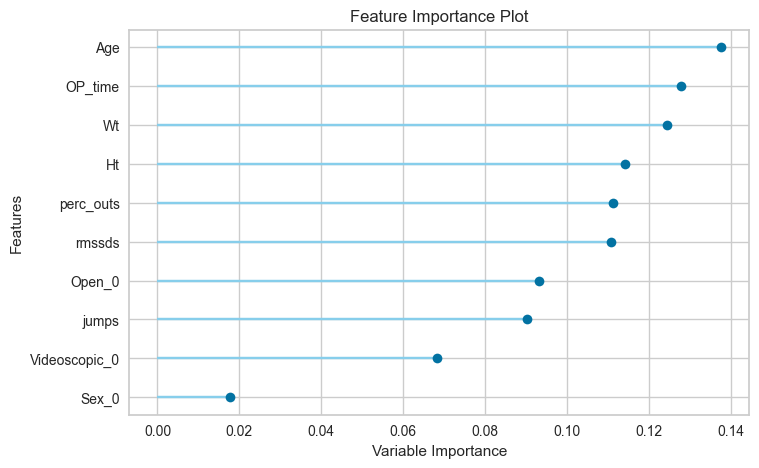

In [18]:
plot_model(best, plot='feature')